In [2]:
#import libraries
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing dataset
dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

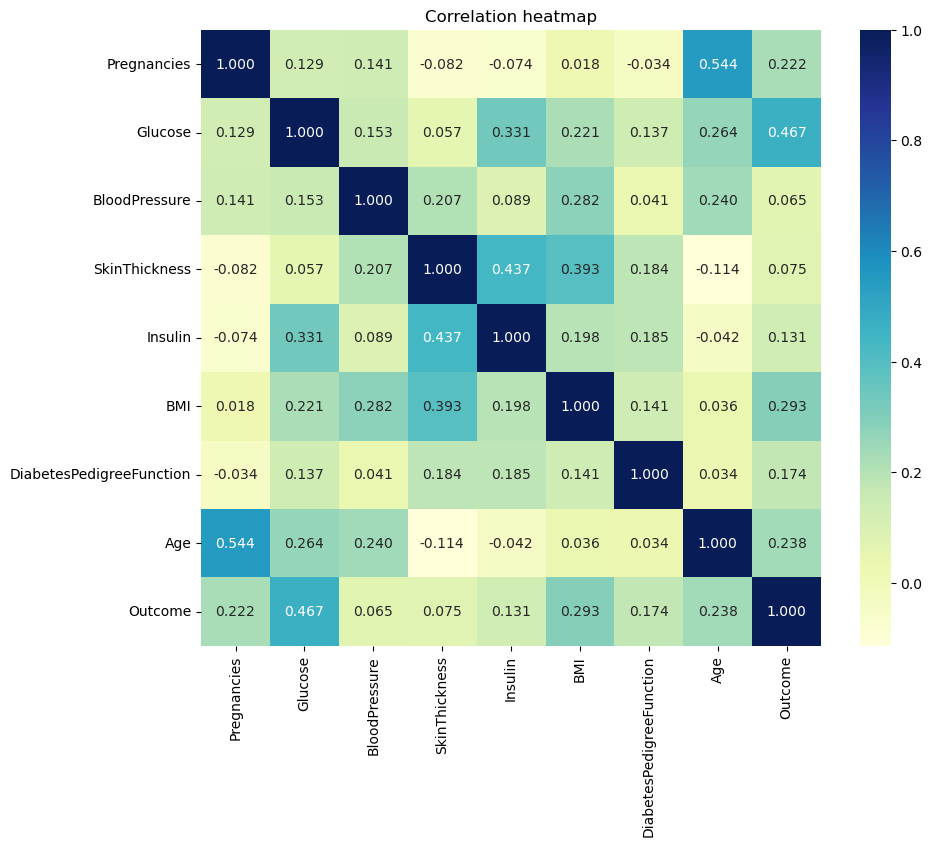

In [7]:
# Correlation plot of independent variables
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot = True, fmt = ".3f", cmap = "YlGnBu")
plt.title("Correlation heatmap")

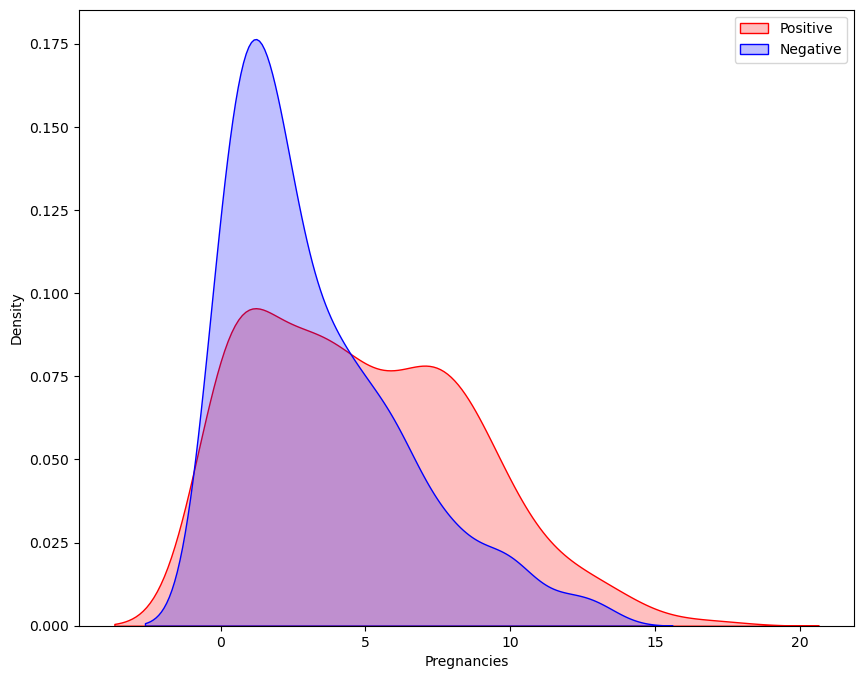

In [9]:
# Exploring Pregnancy and target variables
plt.figure(figsize=(10,8))
# Plotting Density function graph of the pregnancies and target variables
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1], color = "Red", fill = True)
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0], color = "blue", fill = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

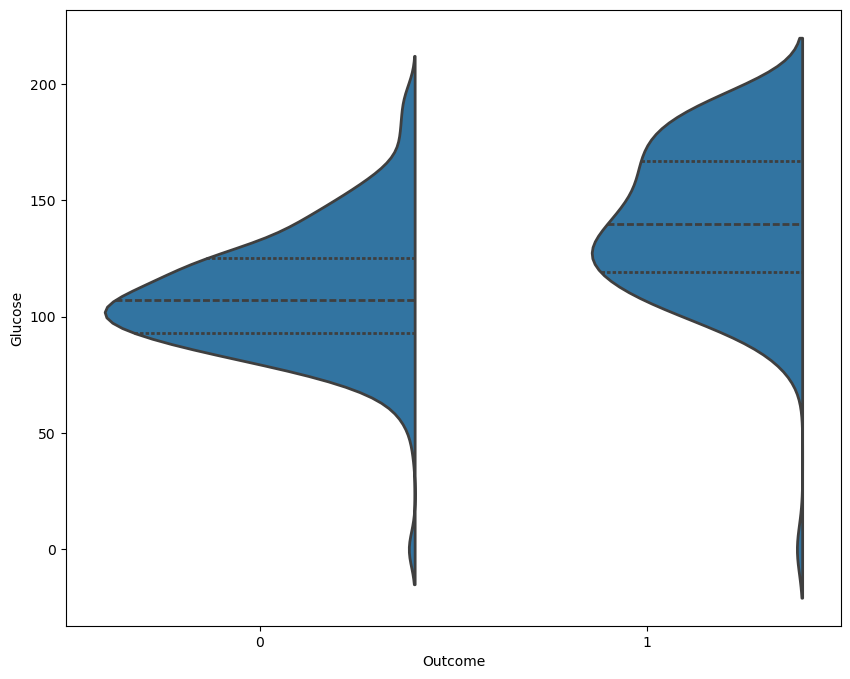

In [14]:
# Exploring Glucose and target variables
plt.figure(figsize=(10,8))
sns.violinplot(data = dataset, x = "Outcome", y = "Glucose", split = True, linewidth = 2, inner = "quart")

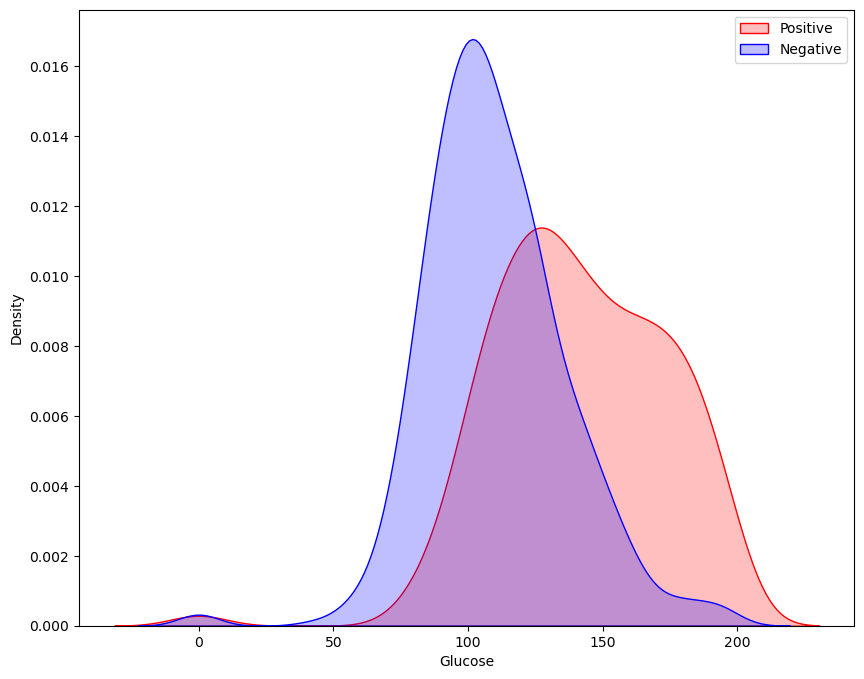

In [16]:
# Exploring Glucose and target variables
plt.figure(figsize=(10,8))
# Plotting Density function graph of Glucose and target variables
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1], color = "Red", fill = True)
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0], color = "blue", fill = True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

In [18]:
# Replace 0 values with the mean/median of the respective feature
# Glucose
dataset["Glucose"] = dataset["Glucose"].replace(0, dataset["Glucose"].median())
# BloodPressure
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0, dataset["BloodPressure"].median())
# BMI
dataset["BMI"] = dataset["BMI"].replace(0, dataset["BMI"].mean())
# SkinThickness
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0, dataset["SkinThickness"].mean())
# Insulin
dataset["Insulin"] = dataset["Insulin"].replace(0, dataset["Insulin"].mean())

In [21]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [24]:
# Splitting the dependent and independent variable
X = dataset.drop(["Outcome"], axis = 1)
y = dataset["Outcome"]

In [26]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,79.799479,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,20.536458,79.799479,30.1,0.349,47


In [28]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [30]:
# Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89,62,20.536458,79.799479,22.500000,0.142,33
127,1,118,58,36.000000,94.000000,33.300000,0.261,23
564,0,91,80,20.536458,79.799479,32.400000,0.601,27
375,12,140,82,43.000000,325.000000,39.200000,0.528,58
663,9,145,80,46.000000,130.000000,37.900000,0.637,40
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.900000,0.171,63
192,7,159,66,20.536458,79.799479,30.400000,0.383,36
629,4,94,65,22.000000,79.799479,24.700000,0.148,21
559,11,85,74,20.536458,79.799479,30.100000,0.300,35


In [36]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43.000000,79.799479,42.9,1.394,22
122,2,107,74,30.000000,100.000000,33.6,0.404,23
113,4,76,62,20.536458,79.799479,34.0,0.391,25
14,5,166,72,19.000000,175.000000,25.8,0.587,51
529,0,111,65,20.536458,79.799479,24.6,0.660,31
...,...,...,...,...,...,...,...,...
366,6,124,72,20.536458,79.799479,27.6,0.368,29
301,2,144,58,33.000000,135.000000,31.6,0.422,25
382,1,109,60,8.000000,182.000000,25.4,0.947,21
140,3,128,78,20.536458,79.799479,21.1,0.268,55


In [38]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64

In [40]:
y_train

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 576, dtype: int64

In [42]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score


In [43]:
#Random Forest
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [46]:
#K Nearest Neighbour
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
#Gaussian NB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [50]:
#decision Tree Classifier
dc = DecisionTreeClassifier(random_state = 0)
dc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [52]:
#support Vector machine
#svm = SVC(kernel = 'rbf', random_state = 1)
#svm.fit(X_train, y_train)
svc = SVC(probability = True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [54]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=42)

Classification
ROC/AUC curve
 In particular, the random forest algorithm achieved 84% accuracy, 95% area under the curve (AUC), 77% sensitivity, and 91% specificity 
 Comparission between all the models used

In [57]:
#Prediction of Probabilities
r_probs = [0 for _ in range (len(y_test))]
rf_probs = rf.predict_proba(X_test)
mlp_probs = mlp.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
dc_probs = dc.predict_proba(X_test)
kn_probs = kn.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)

In [59]:
rf_probs = rf_probs[:,1]
mlp_probs = mlp_probs[:,1]
nb_probs = nb_probs[:,1]
dc_probs = dc_probs[:,1]
kn_probs = kn_probs[:,1]
svc_probs = svc_probs[:,1]

In [61]:
#Calculate AUROC
rf_auc = roc_auc_score(y_test, rf_probs)
mlp_auc= roc_auc_score(y_test, mlp_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
dc_auc = roc_auc_score(y_test, dc_probs)
kn_auc = roc_auc_score(y_test, kn_probs)
svc_auc = roc_auc_score(y_test, svc_probs)

In [63]:
print("Random forest : AUROC = %0.3f"%(rf_auc))
print("Naive Bayes : AUROC = %0.3f"%(nb_auc))
print("MLPClassifier : AUROC = %0.3f"%(mlp_auc))
print("Decision Tree : AUROC = %0.3f"%(dc_auc))
print("KNN : AUROC = %0.3f"%(kn_auc))
print("Support Vector Machine : AUROC = %0.3f"%(svc_auc))

Random forest : AUROC = 0.839
Naive Bayes : AUROC = 0.824
MLPClassifier : AUROC = 0.690
Decision Tree : AUROC = 0.710
KNN : AUROC = 0.756
Support Vector Machine : AUROC = 0.839


In [65]:
#Predicting The test set results
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
dc_fpr, dc_tpr, _ = roc_curve(y_test, dc_probs)
kn_fpr, kn_tpr, _ = roc_curve(y_test, kn_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)

In [67]:
def plot_roc_curve(rf_fpr, rf_tpr):
    plt.plot(rf_fpr, rf_tpr, marker= '.', label='Random Forest (AUROC = %0.3f)'%rf_auc) 
    plt.plot(nb_fpr, nb_tpr, marker= '.', label='Naive bayes (AUROC = %0.3f)'%nb_auc)
    plt.plot(mlp_fpr, mlp_tpr, marker= '.', label='MLPClassifier (AUROC = %0.3f)'%mlp_auc)
    plt.plot(dc_fpr, dc_tpr, marker= '.', label='Decision Tree (AUROC = %0.3f)'%dc_auc)
    plt.plot(kn_fpr, kn_tpr, marker= '.', label='KNN (AUROC = %0.3f)'%kn_auc)
    plt.plot(svc_fpr, svc_tpr, marker= '.', label='Support Vector Machine (AUROC = %0.3f)'%svc_auc)
    plt.xlabel('False Positive Rate (1 - specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

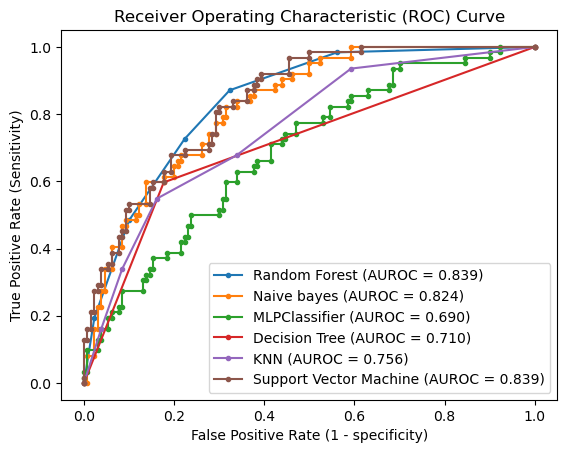

In [69]:
plot_roc_curve(rf_fpr, rf_tpr)

In [71]:
kn.fit(X_train, y_train)
print(kn.score(X_train, y_train), ": Training accuracy")
print(kn.score(X_test, y_test), ": Test accuracy")   

0.7986111111111112 : Training accuracy
0.7447916666666666 : Test accuracy


In [73]:
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train), ": Training accuracy")
print(rf.score(X_test, y_test), ": Test accuracy")   

0.9618055555555556 : Training accuracy
0.7291666666666666 : Test accuracy


In [75]:
nb.fit(X_train, y_train)
print(nb.score(X_train, y_train), ": Training accuracy")
print(nb.score(X_test, y_test), ": Test accuracy")   

0.7430555555555556 : Training accuracy
0.7604166666666666 : Test accuracy


In [77]:
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train), ": Training accuracy")
print(svc.score(X_test, y_test), ": Test accuracy")   

0.7621527777777778 : Training accuracy
0.765625 : Test accuracy


In [79]:
dc.fit(X_train, y_train)
print(dc.score(X_train, y_train), ": Training accuracy")
print(dc.score(X_test, y_test), ": Test accuracy")   

1.0 : Training accuracy
0.75 : Test accuracy


In [81]:
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train), ": Training accuracy")
print(mlp.score(X_test, y_test), ": Test accuracy")   

0.7204861111111112 : Training accuracy
0.6822916666666666 : Test accuracy
